In [13]:
import numpy as np
import tensorflow as tf

from keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalise pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

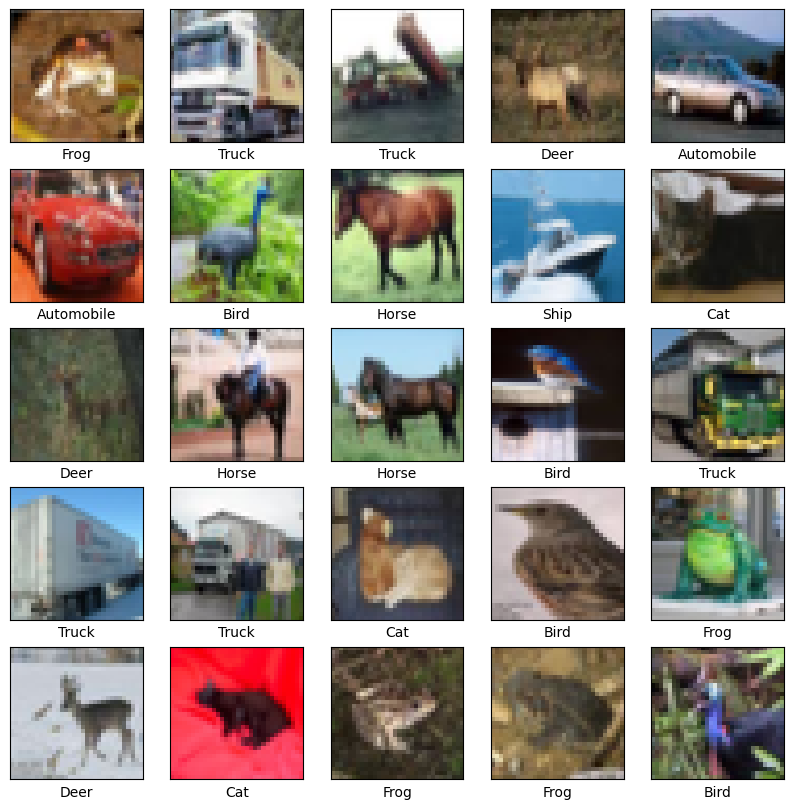

In [3]:
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

2023-02-25 14:08:36.816878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 14:08:36.822183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 14:08:36.822367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 14:08:36.822972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


2023-02-25 14:08:41.601482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-25 14:08:42.134246: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-25 14:08:42.906681: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fad18c4f470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-25 14:08:42.906721: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-02-25 14:08:43.243469: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-25 14:08:44.737438: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-25 14:08:44.801245: I tensorflow/compiler/jit/xla_compil

1563/1563 [==============================] - 12s 4ms/step - loss: 1.5174 - accuracy: 0.4460 - val_loss: 1.2757 - val_accuracy: 0.5321
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1626 - accuracy: 0.5886 - val_loss: 1.1106 - val_accuracy: 0.6032
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0211 - accuracy: 0.6414 - val_loss: 1.0266 - val_accuracy: 0.6387
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9353 - accuracy: 0.6719 - val_loss: 0.9547 - val_accuracy: 0.6698
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8674 - accuracy: 0.6978 - val_loss: 0.9049 - val_accuracy: 0.6875
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8094 - accuracy: 0.7204 - val_loss: 0.9212 - val_accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7605 - accuracy: 0.7344 - val_loss: 0.8793 - val_accuracy: 0.6956
Ep

313/313 - 1s - loss: 0.8688 - accuracy: 0.7031 - 639ms/epoch - 2ms/step


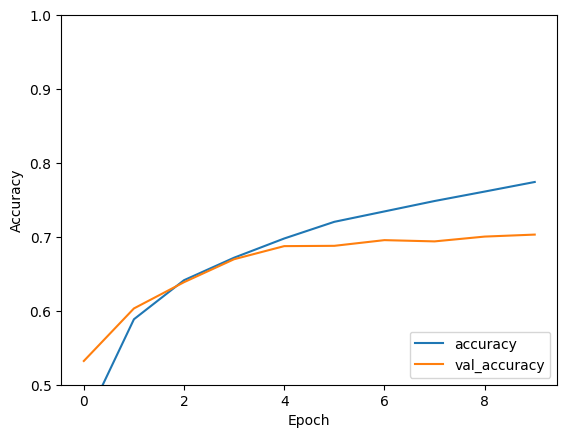

In [7]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [10]:
predictions = model.predict(test_images)
tf.nn.softmax(predictions)

313/313 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.6724616e-02, 7.3251157e-04, 4.3586589e-02, ..., 7.3193014e-04,
        1.9829968e-02, 3.4945318e-03],
       [1.7333393e-03, 8.9784444e-04, 1.9213003e-06, ..., 1.3752713e-09,
        9.9699724e-01, 3.6441363e-04],
       [3.9786804e-01, 1.0196061e-01, 2.2537943e-03, ..., 5.2067754e-04,
        4.0807751e-01, 8.4250242e-02],
       ...,
       [5.4999473e-05, 1.9860285e-07, 8.3163464e-03, ..., 7.1493932e-04,
        2.6965691e-07, 9.3199162e-07],
       [2.6411800e-02, 9.6885836e-01, 1.7984098e-04, ..., 9.7748751e-05,
        2.8996337e-05, 1.0365366e-03],
       [5.4505663e-06, 2.2679881e-06, 7.9723060e-05, ..., 9.9436152e-01,
        3.7449151e-08, 2.8988526e-07]], dtype=float32)>

In [67]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

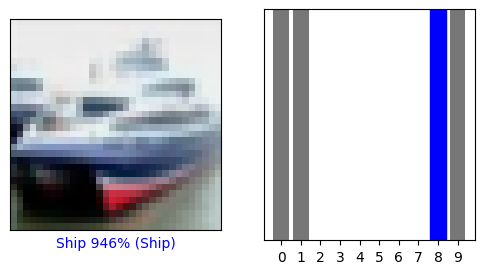

In [68]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

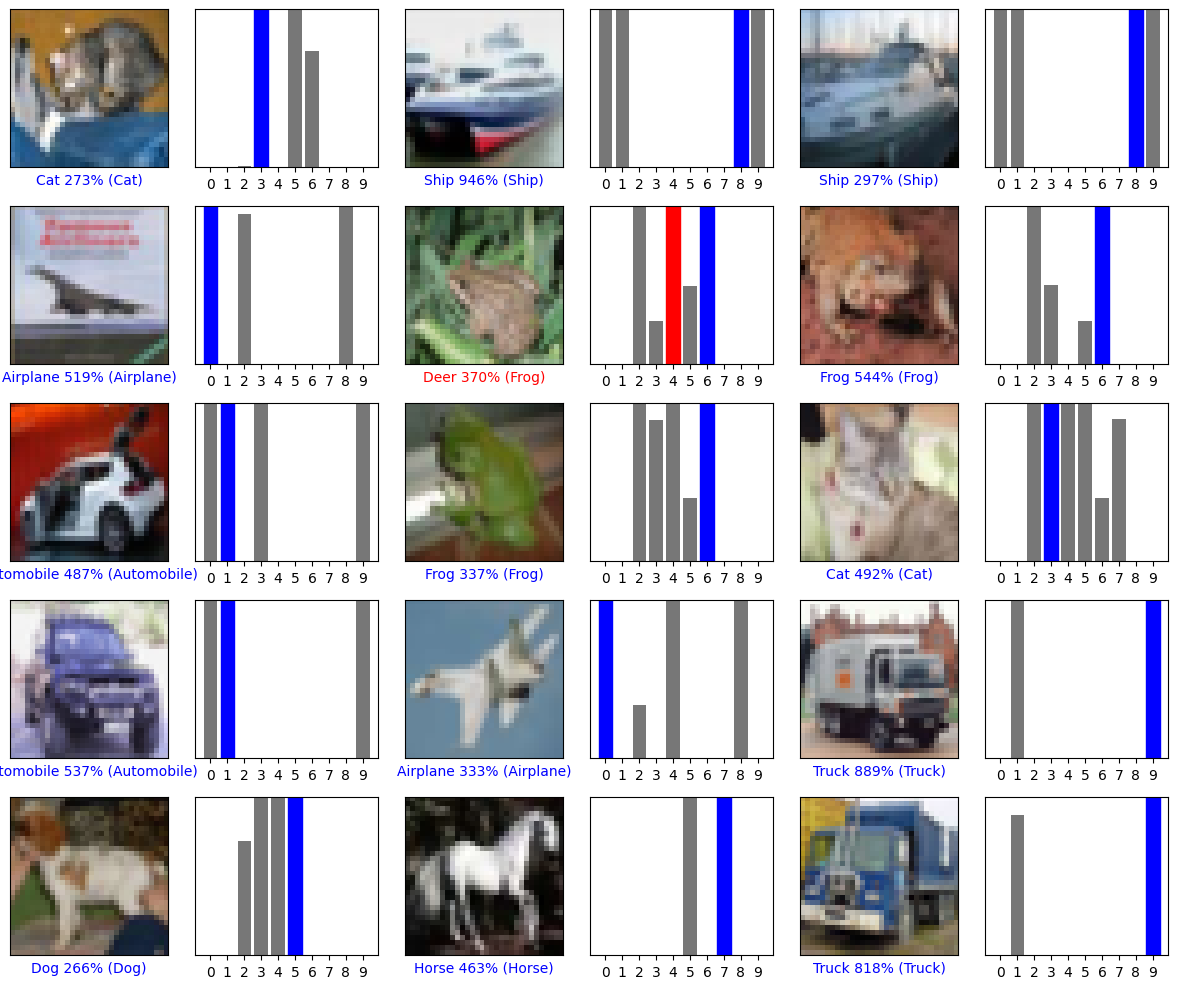

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()